In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_json('https://data.nasa.gov/resource/y77d-th95.json')
df.head(1)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.775,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN


In [6]:
#Dropping the columns with majority null values
df.drop(columns=[':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],axis=1,inplace=True)

In [7]:
#Extracting coordinates from the geological column
crd_1 = []
crd_2 = []
for dict_ in df['geolocation']:
    if type(dict_)==dict:
        crd_1.append(dict_['coordinates'][0])
        crd_2.append(dict_['coordinates'][1])
    else:
        crd_1.append(dict_)
        crd_2.append(dict_)

df['coordinate_1'] = crd_1
df['coordinate_2'] = crd_2

In [9]:
df.drop(columns=['geolocation'],axis=1,inplace=True)

In [10]:
df.nametype.value_counts()
df.fall.value_counts()
#As the nametype column has only 1 feature and the fall column also has highly imbalanced data (around 96%) so we can drop both column
df.drop(columns=['nametype','fall'],axis=1,inplace=True)

In [11]:
#converting the year column into year format
df['year']=df['year'].apply(lambda x:str(x)[:10])

In [12]:
df['year']=pd.to_datetime(df['year'],errors='ignore')

In [36]:
df['mass'].fillna(df['mass'].median(),inplace=True)
df['reclat'].fillna(df['reclat'].median(),inplace=True)
df['reclong'].fillna(df['reclong'].median(),inplace=True)
df['coordinate_1'].fillna(df['coordinate_1'].median(),inplace=True)
df['coordinate_2'].fillna(df['coordinate_2'].median(),inplace=True)
df = df[df['year'] != 'nan']

In [41]:
meteorites_before_2000=df[df['year'] < '2000-01-01']

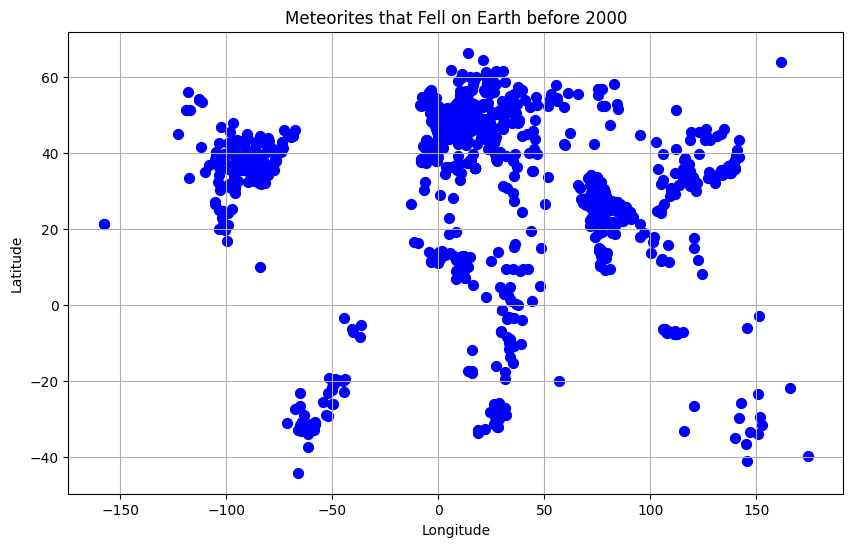

In [43]:
latitude = meteorites_before_2000['reclat']
longitude = meteorites_before_2000['reclong']

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, s=50, color='blue')
plt.title('Meteorites that Fell on Earth before 2000')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [48]:
meteorites_before_1970=df[df['year']<'1970-01-01']

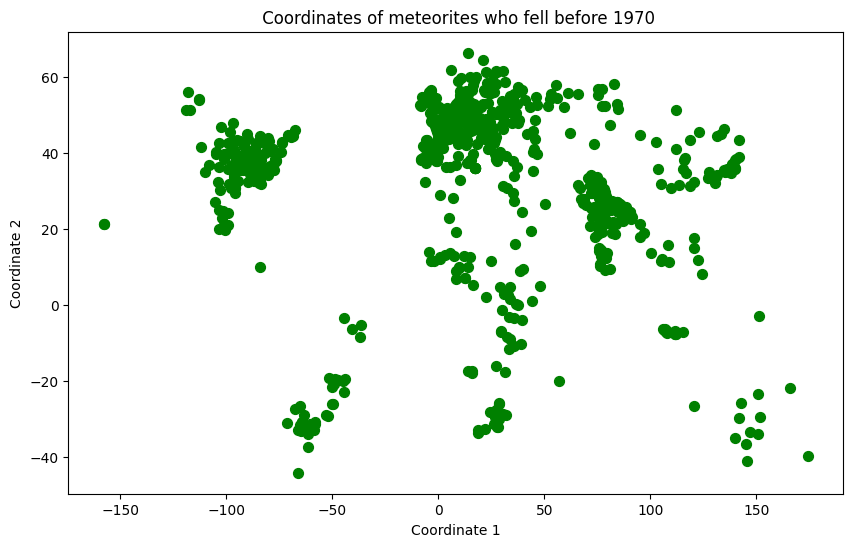

In [51]:
# Plotting coordinates 1 and 2 on the scatterplot  in meteorites_before_1970
coordinate_1=meteorites_before_1970['coordinate_1']
coordinate_2=meteorites_before_1970['coordinate_2']
plt.figure(figsize=(10, 6))
plt.scatter(coordinate_1,coordinate_2,s=50,color='green')
plt.title(' Coordinates of meteorites who fell before 1970')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.show()

In [58]:
df['mass']=df['mass'].astype('int')
mass_more_than_10000=df[df['mass']>10000]

C:\Users\HP\AppData\Local\Temp\ipykernel_18980\2452564570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mass']=df['mass'].astype('int')


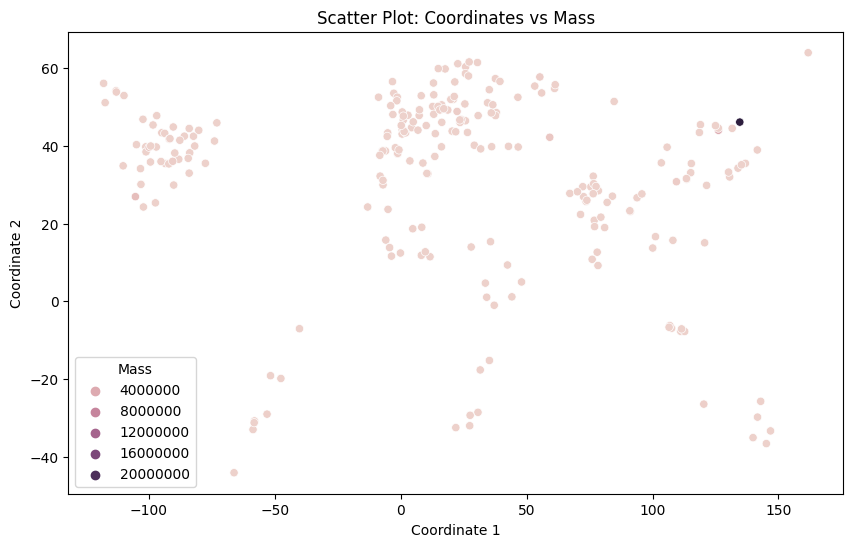

In [87]:
# Plotting coordinates 1 and 2 with mass more than 10000 as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mass_more_than_10000, x='coordinate_1', y='coordinate_2', hue='mass')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Scatter Plot: Coordinates vs Mass')
plt.legend(title='Mass')
plt.show()